# CC3001 Otoño 2023 Tarea 1 [Roberto Rivera Carrasco]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
def arena(N):
  # escriba su código aquí
  r = m.ceil(m.sqrt(N/m.pi))
  d = 2*r + 1
  tablero = np.zeros((d,d))
  tablero[r , r] = N
  c = 0
  while np.max(tablero) >= 4:
    for fila in range(tablero.shape[0]):
        for columna in range(tablero.shape[1]):
            if tablero[fila, columna] >= 4:
                tablero[fila, columna] -= 4
                tablero[fila + 1 , columna] += 1
                tablero[fila - 1, columna] += 1
                tablero[fila, columna + 1] += 1
                tablero[fila, columna - 1] += 1
                c += 1
  print(c)
  plt.matshow(tablero)
  plt.show()

Explique aquí cómo calculó el tamaño que necesita tener el tablero.

R: al observar el desarrollo de este algoritmo de distribución (hecho a mano sobre un papel), podemos observar que al crecer la figura se va pareciendo a un círculo. \
luego, suponemos el mayor radio r posible para un número N de granos de arena con la fórmula del área del círculo así: \
$\pi * r^{2} = N$ \
de donde despejamos el valor del radio: \
$r = \sqrt{{n/\pi}}$ \
para tener un entero ligeramente mayor que no provoque problemas en la ejecución del algoritmo, consideramos el radio como el techo (entero igual o inmediatamente superior) del valor obtenido. \
finalmente, el lado de la matriz cuadrada que representa el tablero será $d = 2r + 1$, para que así sea de un largo impar de casillas y poder ingresar los granos justo en el centro de este tablero.

Ahora ejecute la función para $N=128$:

342


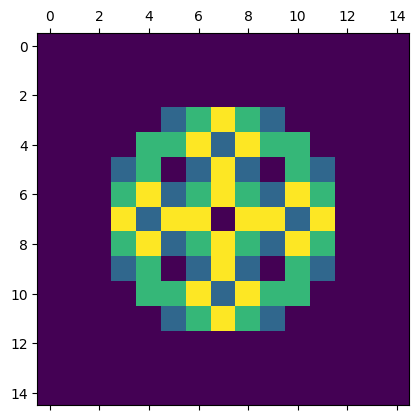

In [ ]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

1830917


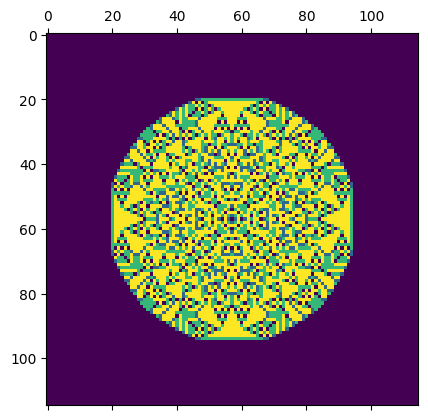

In [ ]:
arena(10000) # reemplace N por el valor máximo que alcanzó a procesar

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
def arena2(N):
  # escriba su código aquí
  r = m.ceil(m.sqrt(N/m.pi))
  d = 2*r + 1
  tablero = np.zeros((d,d))
  tablero[r , r] = N
  c = 0
  while np.max(tablero) >= 4:
    for fila in range(tablero.shape[0]):
        for columna in range(tablero.shape[1]):
            if tablero[fila, columna] >= 4:
              max = tablero[fila, columna] // 4
              tablero[fila, columna] -= max * 4
              tablero[fila + 1 , columna] += max
              tablero[fila - 1, columna] += max
              tablero[fila, columna + 1] += max
              tablero[fila, columna - 1] += max
              c += 1
  print(c)
  plt.matshow(tablero)
  plt.show()

Ahora ejecute la función para $N=128$:

227


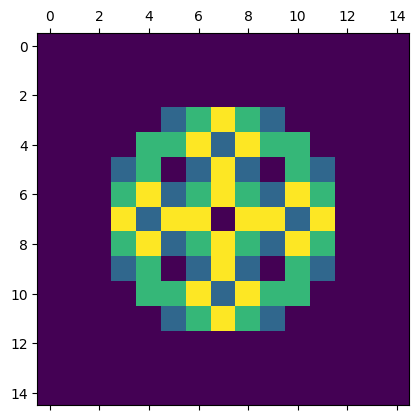

In [ ]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

10600158


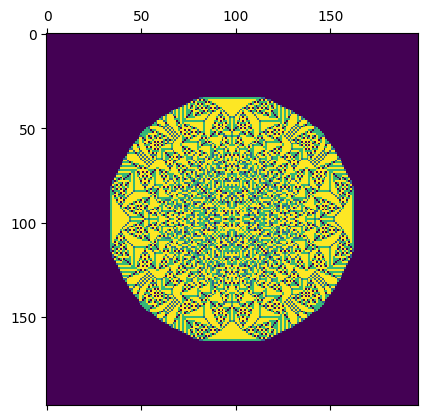

In [ ]:
arena2(30000) # reemplace N por el valor máximo que alcanzó a procesar

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabla = pd.DataFrame({"128 granos":[342,227],"256 granos":[1220,780],"512 granos":[5175,3401],"1024 granos":[20384,13579],"2500 granos":[118003,77719],"5000 granos":[466188,307656],"10000 granos":[1830917,1196817]}, index=["aplicacones arena" , "aplicaciones arena2"])
tabla


,128 granos,256 granos,512 granos,1024 granos,2500 granos,5000 granos,10000 granos
aplicacones arena,342,1220,5175,20384,118003,466188,1830917
aplicaciones arena2,227,780,3401,13579,77719,307656,1196817


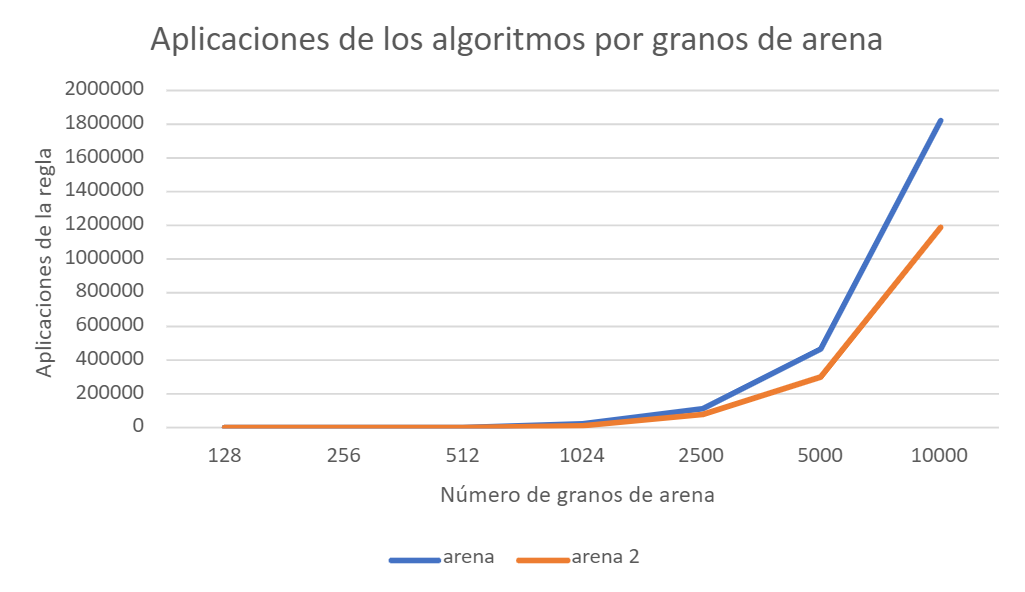

Si bien en los primeros valores probados la diferencia no parece ser relevante, a medida que la cantidad N de granos aumenta la brecha se agranda, llegando en la última prueba a comparar 1830917 iteraciones del algoritmo de la función arena con 1196817 correspondientes a arena 2, es decir, una diferencia de 634100 iteraciones correspondiente aproximadamente al %34 del total del primer algoritmo, lo cuál es no solo una diferencia considerable porcentualmente sino que significa evitar cientos de miles de iteraciones, lo cual nos ahorra mucho tiempo y memoria con solo haber implementado un pequeño cambio conceptual en el código, por tanto sí valió la pena la optimización. \
\
Otra posible optimización sería crear una función auxiliar que con la entrada del valor N de granos calcule previamente el tamaño justo necesario del tablero, para que así la función arena genere una matriz más pequeña que sería más rápida de recorrer y nos ahorraría tiempo y memoria. Otra alternativa sería encontrar la forma más eficiente de realizar la distribución (por ejemplo, de las casillas con más a menos granos, de las casillas con menos a más granos, recorrer en forma diagonal, espiral, realizar más de una distribución en cada aplicación prediciendo cuándo se van realizar varias seguidas, etc.) e implementarla en el código.